<a href="https://colab.research.google.com/github/Ashish1227/MNIST_HPTune/blob/main/mnist_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -q nengo nengo_extras
# !git clone https://github.com/Ashish1227/my_nengo_dl
# !pip install -e /content/my_nengo_dl/nengo-dl-main

In [2]:
%matplotlib inline

from urllib.request import urlretrieve

import nengo
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from nengo_extras.data import load_mnist, one_hot_from_labels

import nengo_dl

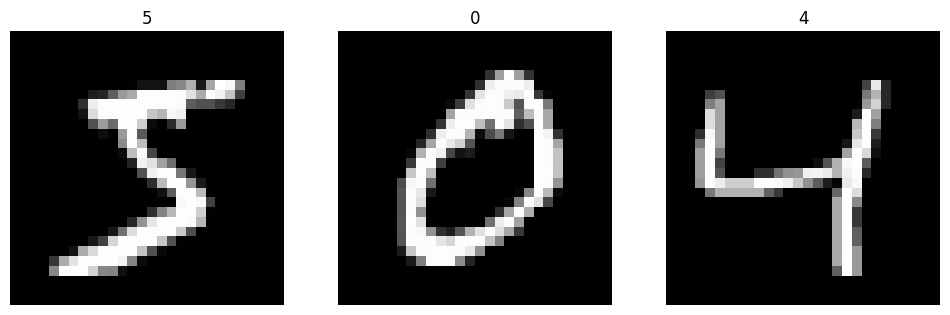

In [3]:
(train_images, train_labels), (
    test_images,
    test_labels,
) = tf.keras.datasets.mnist.load_data()

# flatten images
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(np.reshape(train_images[i], (28, 28)), cmap="gray")
    plt.axis("off")
    plt.title(str(train_labels[i]))

In [4]:
flag=2

In [5]:
# with nengo.Network(seed=42) as net:
#     # set some default parameters for the neurons that will make
#     # the training progress more smoothly
#     net.config[nengo.Ensemble].max_rates = nengo.dists.Choice([100])
#     net.config[nengo.Ensemble].intercepts = nengo.dists.Choice([0])
#     # net.config[nengo.Ensemble].gain = nengo.dists.Choice([1])
#     # net.config[nengo.Ensemble].bias = nengo.dists.Choice([0])
#     net.config[nengo.Connection].synapse = None
#     # neuron_type = nengo.RectifiedLinear()
#     neuron_type = nengo.LIF(amplitude=0.01)
#     nengo_dl.configure_settings(stateful=False)

#     # the input node that will be used to feed in input images
#     inp = nengo.Node(np.zeros(28 * 28))
#     # add the first convolutional layer
#     x = nengo_dl.Layer(tf.keras.layers.Conv2D(filters=32, strides=1, kernel_size=3))(
#         inp, shape_in=(28, 28, 1)
#     )
#     x = nengo_dl.Layer(tf.keras.layers.BatchNormalization())(x)
#     x = nengo_dl.Layer(neuron_type)(x)

#     # add the second convolutional layer
#     x = nengo_dl.Layer(tf.keras.layers.Conv2D(filters=32, strides=1, kernel_size=3))(
#         x, shape_in=(26, 26, 32)
#     )
#     x = nengo_dl.Layer(tf.keras.layers.BatchNormalization())(x)
#     x = nengo_dl.Layer(neuron_type)(x)

#     # add the third convolutional layer
#     x = nengo_dl.Layer(tf.keras.layers.Conv2D(filters=64, strides=2, kernel_size=2))(
#         x, shape_in=(24, 24, 32)
#     )
#     x = nengo_dl.Layer(tf.keras.layers.BatchNormalization())(x)
#     x = nengo_dl.Layer(neuron_type)(x)

#     # add the fourth convolutional layer
#     x = nengo_dl.Layer(tf.keras.layers.Conv2D(filters=128, strides=2, kernel_size=3))(
#         x, shape_in=(12, 12, 64)
#     )
#     x = nengo_dl.Layer(tf.keras.layers.BatchNormalization())(x)
#     x = nengo_dl.Layer(neuron_type)(x)

#     z = nengo_dl.Layer(tf.keras.layers.Flatten())(x)
#     z = nengo_dl.Layer(neuron_type)(z)
#     # z = nengo_dl.Layer(nengo.LIF(amplitude=0.25))(z)

#     # Spiking layers
#     l1 = nengo_dl.Layer(tf.keras.layers.Dense(units=256))(z)
#     l1 = nengo_dl.Layer(neuron_type)(l1)
#     # l1 = nengo_dl.Layer(nengo.LIF(amplitude=0.01))(l1)

#     l2 = nengo_dl.Layer(tf.keras.layers.Dense(units=128))(l1)
#     l2 = nengo_dl.Layer(neuron_type)(l2)
#     # l2 = nengo_dl.Layer(nengo.LIF(amplitude=0.01))(l2)

#     l3 = nengo_dl.Layer(tf.keras.layers.Dense(units=64))(l2)
#     l3 = nengo_dl.Layer(neuron_type)(l3)
#     # l3 = nengo_dl.Layer(nengo.LIF(amplitude=0.01))(l3)


#     # Output layer (spiking)
#     out = nengo_dl.Layer(tf.keras.layers.Dense(units=10))(l3)

#     out_p = nengo.Probe(out,label="out_p")
#     out_p_filt = nengo.Probe(out,synapse=0.1,label="out_p_filt")

In [21]:
with nengo.Network(seed=0) as net:
    # set some default parameters for the neurons that will make
    # the training progress more smoothly
    net.config[nengo.Ensemble].gain = nengo.dists.Choice([1])
    net.config[nengo.Ensemble].bias = nengo.dists.Choice([0])
    # net.config[nengo.Ensemble].max_rates = nengo.dists.Choice([100])
    # net.config[nengo.Ensemble].intercepts = nengo.dists.Choice([0])
    net.config[nengo.Connection].synapse = None
    if(flag!=3):
      neuron_type = nengo.RectifiedLinear()
    elif(flag==3):
      neuron_type = nengo.LIF(amplitude=0.01)
    net.config[nengo.Connection].transform = nengo_dl.dists.Glorot()

    # this is an optimization to improve the training speed,
    # since we won't require stateful behaviour in this example
    nengo_dl.configure_settings(stateful=False)

    # the input node that will be used to feed in input images
    inp = nengo.Node(np.zeros(28 * 28))
    # add the first convolutional layer
    x = nengo_dl.Layer(tf.keras.layers.Conv2D(filters=32, strides=1, kernel_size=3))(
        inp, shape_in=(28, 28, 1)
    )
    # x = nengo_dl.Layer(tf.keras.layers.BatchNormalization())(x)
    x = nengo_dl.Layer(neuron_type)(x)

    # add the second convolutional layer
    x = nengo_dl.Layer(tf.keras.layers.Conv2D(filters=32, strides=1, kernel_size=3))(
        x, shape_in=(26, 26, 32)
    )
    #x = nengo_dl.Layer(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))(x,shape_out=(13,13,32))
    x = nengo_dl.Layer(neuron_type)(x)

    # add the third convolutional layer
    x = nengo_dl.Layer(tf.keras.layers.Conv2D(filters=64, strides=2, kernel_size=2))(
        x, shape_in=(24, 24, 32)
    )
    x = nengo_dl.Layer(neuron_type)(x)

    # add the fourth convolutional layer
    x = nengo_dl.Layer(tf.keras.layers.Conv2D(filters=128, strides=2, kernel_size=3))(
        x, shape_in=(12, 12, 64)
    )

    z = nengo_dl.Layer(nengo.LIF(amplitude=0.01))(x)
    l1 = nengo_dl.Layer(tf.keras.layers.Dense(units=512))(z)
    l1 = nengo_dl.Layer(nengo.LIF(amplitude=0.01))(l1)

    l2 = nengo_dl.Layer(tf.keras.layers.Dense(units=128))(l1)
    l2 = nengo_dl.Layer(nengo.LIF(amplitude=0.01))(l2)

    l3 = nengo_dl.Layer(tf.keras.layers.Dense(units=64))(l2)
    l3 = nengo_dl.Layer(nengo.LIF(amplitude=0.01))(l3)
    # if(flag==2):
    #   l1 = nengo.Ensemble(512, 1, neuron_type=nengo.LIF(amplitude=0.01)).neurons
    #   nengo.Connection(z, l1)
    #   l2 = nengo.Ensemble(128, 1, neuron_type=nengo.LIF(amplitude=0.01)).neurons
    #   nengo.Connection(l1, l2)
    #   x = nengo.Ensemble(64, 1, neuron_type=nengo.LIF(amplitude=0.01)).neurons
    #   nengo.Connection(l2, x)
    # linear readout
    out = nengo_dl.Layer(tf.keras.layers.Dense(units=10))(l3)

    # we'll create two different output probes, one with a filter
    # (for when we're simulating the network over time and
    # accumulating spikes), and one without (for when we're
    # training the network using a rate-based approximation)
    out_p = nengo.Probe(out, label="out_p")
    if(flag!=1):
      out_p_filt = nengo.Probe(out, synapse=0.1, label="out_p_filt")

In [22]:
minibatch_size = 200
sim = nengo_dl.Simulator(net, minibatch_size=minibatch_size)

Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
|#                        Constructing graph                          | 0:00:00

/usr/local/lib/python3.10/dist-packages/nengo/neurons.py:584: RuntimeWarning: divide by zero encountered in log1p
  self.tau_ref - self.tau_rc * np.log1p(1.0 / (gain * (intercepts - 1) - 1))


Construction finished in 0:00:00                                               


In [8]:
# add single timestep to training data
train_images = train_images[:, None, :]
train_labels = train_labels[:, None, None]

if(flag==1):
  test_images = test_images[:, None, :]
  test_labels = test_labels[:, None, None]

# when testing our network with spiking neurons we will need to run it
# over time, so we repeat the input/target data for a number of
# timesteps.
if(flag==2 or flag==3):
  n_steps = 30
  test_images = np.tile(test_images[:, None, :], (1, n_steps, 1))
  test_labels = np.tile(test_labels[:, None, None], (1, n_steps, 1))

In [23]:
def classification_accuracy(y_true, y_pred):
    global flag
    if(flag==1):
        return tf.metrics.sparse_categorical_accuracy(y_true, y_pred)
    else:
        return tf.metrics.sparse_categorical_accuracy(y_true[:, -1], y_pred[:, -1])



# note that we use `out_p_filt` when testing (to reduce the spike noise)
if(flag!=1):
  sim.compile(loss={out_p_filt: classification_accuracy})
  print(
      "Accuracy before training:",
      sim.evaluate(test_images, {out_p_filt: test_labels}, verbose=0)["loss"],
  )

Accuracy before training: 0.10270000249147415


In [24]:
if(flag==1):
  with net:
      nengo_dl.configure_settings(stateful=False, use_loop=False)


  with nengo_dl.Simulator(net, minibatch_size=200) as sim:
      sim.compile(
          optimizer=tf.optimizers.Adam(),
          loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=["accuracy"],
      )
      sim.fit(train_images, train_labels, epochs=20)
      sim.compile(loss={out_p: classification_accuracy})
      print(
          "Test accuracy:",
          sim.evaluate(test_images, test_labels, verbose=0)["loss"],
      )

In [25]:
if(flag!=1):
  do_training = True
  if do_training:
      # run training
      sim.compile(
          # optimizer=tf.optimizers.RMSprop(0.0005),
          optimizer = tf.optimizers.Adam(),
          loss={out_p: tf.losses.SparseCategoricalCrossentropy(from_logits=True)},
      )
      sim.fit(train_images, {out_p: train_labels}, epochs=20)

      # save the parameters to file
      sim.save_params("./mnist_params")
  else:
      # download pretrained weights
      urlretrieve(
          "https://drive.google.com/uc?export=download&"
          "id=1l5aivQljFoXzPP5JVccdFXbOYRv3BCJR",
          "mnist_params.npz",
      )

      # load parameters
      sim.load_params("./mnist_params")

Epoch 1/20
300/300 [==============================] - 18s 30ms/step - loss: 2.3018 - out_p_loss: 2.3018
Epoch 2/20
262/300 [=========================>....] - ETA: 1s - loss: 2.3013 - out_p_loss: 2.3013

KeyboardInterrupt: ignored

In [12]:
if(flag!=1):
  sim.compile(loss={out_p_filt: classification_accuracy})
  print(
      "Accuracy after training:",
      sim.evaluate(test_images, {out_p_filt: test_labels}, verbose=0)["loss"],
  )

Accuracy after training: 0.8708000183105469


1/1 [==============================] - 4s 4s/step


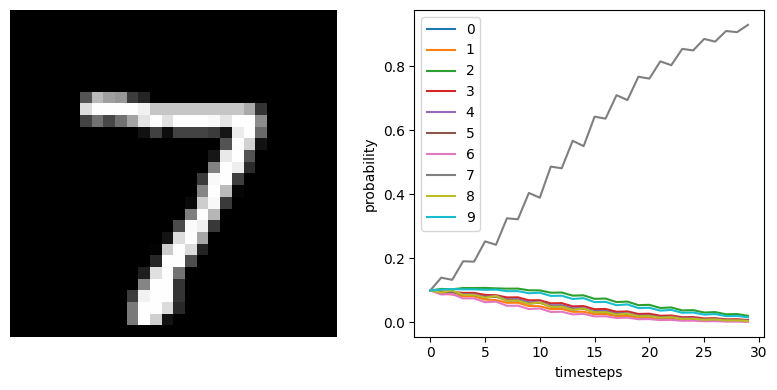

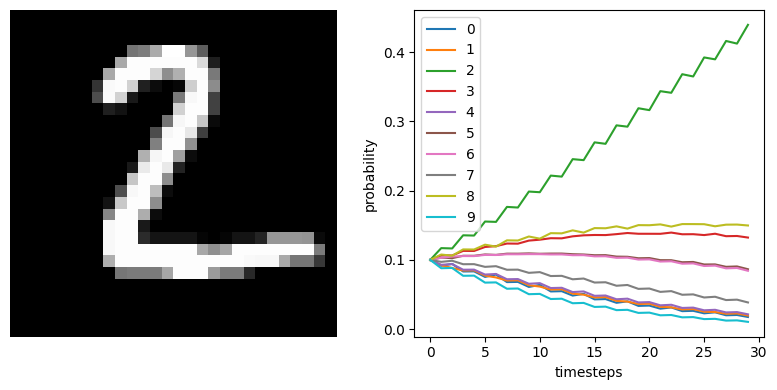

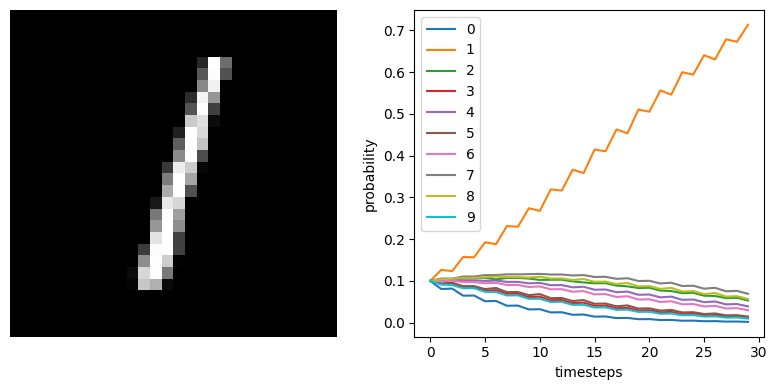

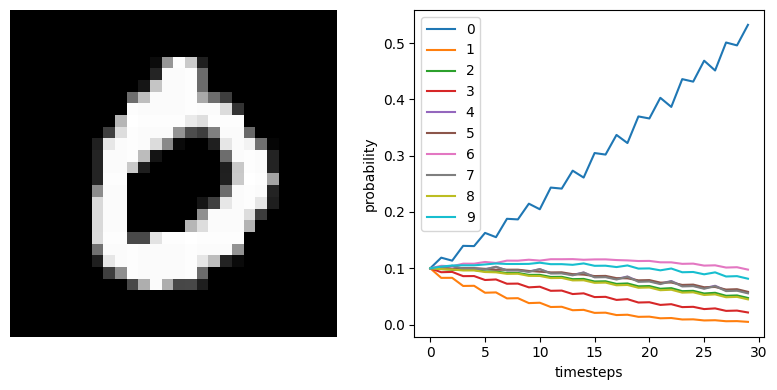

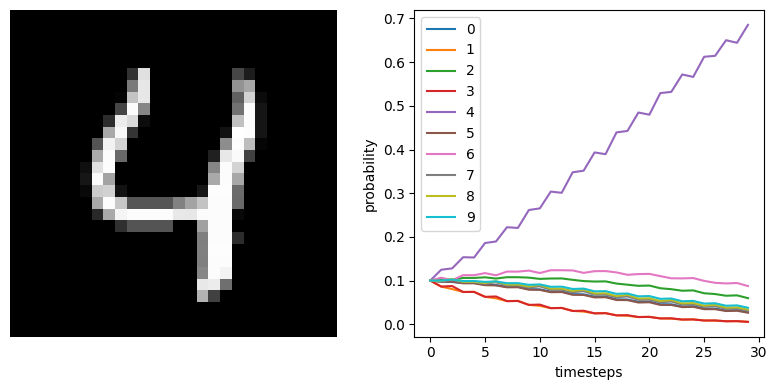

In [13]:
if(flag!=1):
  data = sim.predict(test_images[:minibatch_size])

  for i in range(5):
      plt.figure(figsize=(8, 4))
      plt.subplot(1, 2, 1)
      plt.imshow(test_images[i, 0].reshape((28, 28)), cmap="gray")
      plt.axis("off")

      plt.subplot(1, 2, 2)
      plt.plot(tf.nn.softmax(data[out_p_filt][i]))
      plt.legend([str(i) for i in range(10)], loc="upper left")
      plt.xlabel("timesteps")
      plt.ylabel("probability")
      plt.tight_layout()

In [19]:
sim.close()